In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform images to tensors & normalize
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

# Download dataset
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# DataLoader for batching
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [2]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)  # input → hidden
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)      # hidden → output

    def forward(self, x):
        x = x.view(-1, 28*28)    # flatten 28x28 to vector
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)          # raw scores (logits)
        return x


In [3]:
model = NeuralNet()
criterion = nn.CrossEntropyLoss()   # classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
for epoch in range(5):  # 5 epochs
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.0649
Epoch [2/5], Loss: 0.2816
Epoch [3/5], Loss: 0.2210
Epoch [4/5], Loss: 0.0139
Epoch [5/5], Loss: 0.0140


In [5]:
correct = 0
total = 0
with torch.no_grad():  # no gradients needed
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # get index of max logit
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.59%


In [6]:
import matplotlib.pyplot as plt

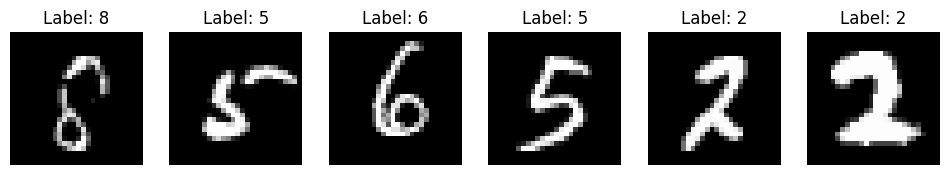

In [7]:
examples = iter(train_loader)
images, labels = next(examples)

fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i][0], cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis("off")
plt.show()


Epoch [1/5], Loss: 0.0977
Epoch [2/5], Loss: 0.0650
Epoch [3/5], Loss: 0.2939
Epoch [4/5], Loss: 0.0441
Epoch [5/5], Loss: 0.1178


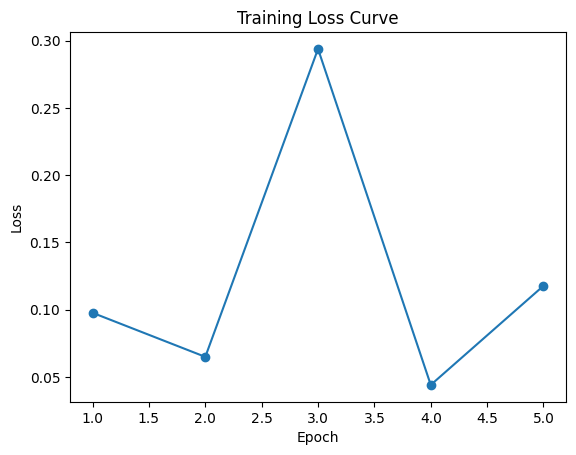

In [8]:
losses = []

for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())
    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(range(1, 6), losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


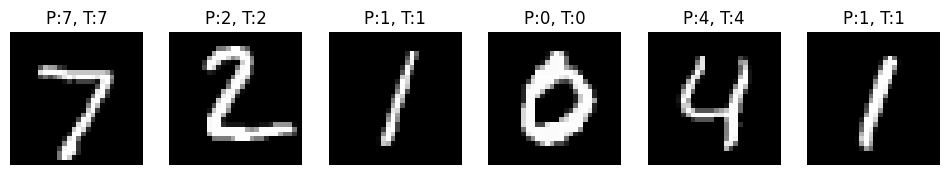

In [9]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i][0], cmap="gray")
    axes[i].set_title(f"P:{preds[i].item()}, T:{labels[i].item()}")
    axes[i].axis("off")
plt.show()
